In [1]:
import torch
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Udacity_DL/Dataset/graduate_admission/Admission_Predict.csv')

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.shape

(400, 9)

In [5]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [0]:
data = data.rename(index=str, columns={'Chance of Admit ' : 'Admit_Probability'})

In [7]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit_Probability
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [0]:
data = data.drop(columns = ['Serial No.'])

In [9]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit_Probability
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


Text(0, 0.5, 'CGPA')

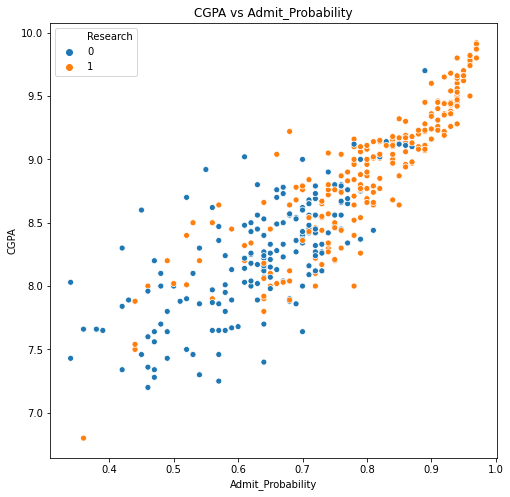

In [10]:
plt.figure(figsize=(8, 8))

fig = sns.scatterplot(x = 'Admit_Probability', y = 'CGPA', data = data, hue = 'Research')

plt.title('CGPA vs Admit_Probability')
plt.xlabel('Admit_Probability')
plt.ylabel('CGPA')

In [11]:
data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit_Probability
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Admit_Probability,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


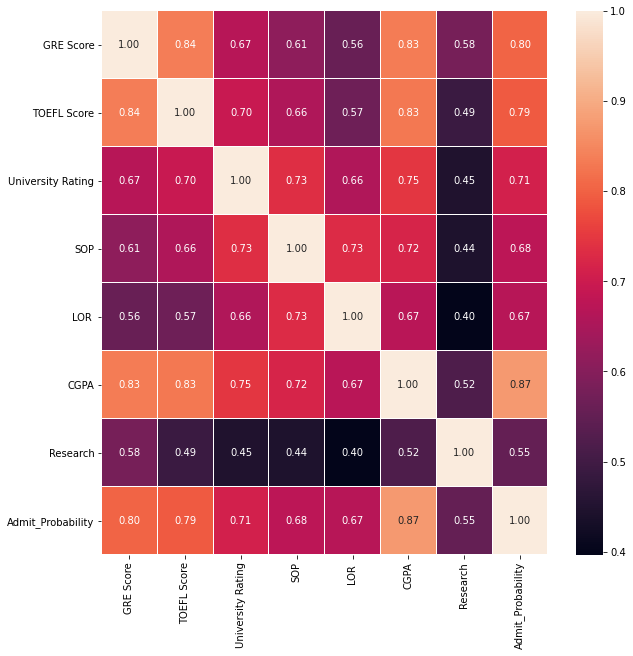

In [12]:
plt.figure(figsize=(10, 10))

sns.heatmap(data.corr(), annot=True, linewidths=0.05, fmt ='.2f')
plt.show()

In [0]:
from sklearn import preprocessing

In [14]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Admit_Probability'],
      dtype='object')

In [0]:
data[['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA']] = preprocessing.scale(data[['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA']])

In [16]:
features = data[['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA']]
features.head()

,GRE Score,TOEFL Score,SOP,LOR,CGPA
0,1.762107,1.746971,1.093864,1.167321,1.764818
1,0.627656,-0.067635,0.596653,1.167321,0.455151
2,-0.070467,-0.562528,-0.397769,0.052933,-1.005631
3,0.453126,0.427257,0.099442,-1.061454,0.119339
4,-0.244998,-0.727492,-1.392191,-0.504260,-0.653029


In [17]:
features.shape

(400, 5)

In [18]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit_Probability
0,1.762107,1.746971,4,1.093864,1.167321,1.764818,1,0.92
1,0.627656,-0.067635,4,0.596653,1.167321,0.455151,1,0.76
2,-0.070467,-0.562528,3,-0.397769,0.052933,-1.005631,1,0.72
3,0.453126,0.427257,3,0.099442,-1.061454,0.119339,1,0.80
4,-0.244998,-0.727492,2,-1.392191,-0.504260,-0.653029,0,0.65


In [0]:
target = data[['Admit_Probability']]

In [20]:
target.head()

,Admit_Probability
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [0]:
y = target.copy()

In [0]:
y.replace(to_replace = target[target >= 0.80], value= int(2), inplace= True)
y.replace(to_replace = target[target >= 0.60], value= int(1), inplace= True)
y.replace(to_replace = target[target < 0.60], value= int(0), inplace= True)

In [0]:
target = y

In [24]:
target['Admit_Probability'].unique()

array([2., 1., 0.])

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2)

In [0]:
Xtrain = torch.from_numpy(X_train.values).float()
Xtest = torch.from_numpy(X_test.values).float()

In [28]:
Xtrain.shape

torch.Size([320, 5])

In [29]:
Y_train.shape, Y_test.shape

((320, 1), (80, 1))

In [0]:
Ytrain = torch.from_numpy(Y_train.values).view(1, -1)[0].long()
Ytest = torch.from_numpy(Y_test.values).view(1, -1)[0].long()

In [31]:
type(Ytrain), type(Ytest)

(torch.Tensor, torch.Tensor)

In [32]:
Ytrain.shape, Ytest.shape

(torch.Size([320]), torch.Size([80]))

In [0]:
import torch.nn as nn
import torch.nn.functional as F

In [0]:
input_size = Xtrain.shape[1]
output_size = len(target['Admit_Probability'].unique())

In [0]:
class Net(nn.Module):

  def __init__(self, hidden_size, activation = 'tanh', apply_dropout = False):
    super(Net, self).__init__()

    self.fc1 = nn.Linear(input_size, hidden_size)
    self.fc2 = nn.Linear(hidden_size, hidden_size)
    self.fc3 = nn.Linear(hidden_size, output_size)

    self.hidden_size = hidden_size
    self.activation = activation
    self.dropout = None
    if apply_dropout:
      self.dropout = nn.Dropout(0.2)

  def forward(self, x):
    activation_fn = None
    if (self.activation == 'tanh'):
      activation_fn = F.torch.tanh
    
    if (self.activation == 'relu'):
      activation_fn = F.relu

    if (self.activation == 'sigmoid'):
      activation_fn =  F.torch.sigmoid 

    x = activation_fn(self.fc1(x))
    x = activation_fn(self.fc2(x))

    if self.dropout != None:
      x = self.dropout(x)

    x = self.fc3(x)
    return F.log_softmax(x, dim=-1)  


In [0]:
import torch.optim as optim

In [0]:
def train_and_evaluate_model(model, learn_rate=0.001, epoch = 1001):
  epoch_data = []
  epochs = epoch

  optimizer = optim.Adam(model.parameters(), lr=learn_rate)

  loss_fn = nn.NLLLoss()

  test_accuracy = 0.0
  for epoch in range(1, epochs):

    optimizer.zero_grad()

    model.train()

    Ypred = model(Xtrain)

    loss = loss_fn(Ypred, Ytrain)
    loss.backward()

    optimizer.step()

    model.eval()


    Ypred_test = model(Xtest)
    loss_test = loss_fn(Ypred_test, Ytest)

    _, pred = Ypred_test.data.max(1)

    test_accuracy = pred.eq(Ytest.data).sum().item() / Y_test.values.size

    epoch_data.append([epoch, loss.data.item(), loss_test.data.item(), test_accuracy])

    if epoch%100 == 0:
      print('epoch - %d (%d%%) train loss - %.2f test loss - %.2f Test accuracy - %.4f'\
            %(epoch, epoch/150 * 10, loss.data.item(),
              loss_test.data.item(), test_accuracy))
      
  return {
      'model' : model,
      'epoch_data' : epoch_data,
      'num_epochs' : epochs,
      'optimizer' : optimizer,
      'loss_fn' : loss_fn,
      'test_accuracy' : test_accuracy,
      '_, pred' : Ypred_test.data.max(1),
      'actual_test_label' : Ytest
  }      
    

In [86]:
net = Net(hidden_size = 50, activation = 'tanh', apply_dropout = False)

net

Net(
  (fc1): Linear(in_features=5, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=3, bias=True)
)

In [87]:
result_50_F = train_and_evaluate_model(net)

epoch - 100 (6%) train loss - 0.43 test loss - 0.53 Test accuracy - 0.7625
epoch - 200 (13%) train loss - 0.39 test loss - 0.58 Test accuracy - 0.7625
epoch - 300 (20%) train loss - 0.37 test loss - 0.62 Test accuracy - 0.7750
epoch - 400 (26%) train loss - 0.35 test loss - 0.64 Test accuracy - 0.7625
epoch - 500 (33%) train loss - 0.33 test loss - 0.68 Test accuracy - 0.7375
epoch - 600 (40%) train loss - 0.31 test loss - 0.74 Test accuracy - 0.7250
epoch - 700 (46%) train loss - 0.28 test loss - 0.80 Test accuracy - 0.7250
epoch - 800 (53%) train loss - 0.25 test loss - 0.87 Test accuracy - 0.7250
epoch - 900 (60%) train loss - 0.21 test loss - 0.96 Test accuracy - 0.7250
epoch - 1000 (66%) train loss - 0.18 test loss - 1.06 Test accuracy - 0.7250


In [88]:
net = Net(hidden_size = 50, activation = 'tanh', apply_dropout = True)

net

Net(
  (fc1): Linear(in_features=5, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=3, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [89]:
result_50_T = train_and_evaluate_model(net)

epoch - 100 (6%) train loss - 0.43 test loss - 0.55 Test accuracy - 0.7625
epoch - 200 (13%) train loss - 0.39 test loss - 0.60 Test accuracy - 0.7500
epoch - 300 (20%) train loss - 0.38 test loss - 0.63 Test accuracy - 0.7625
epoch - 400 (26%) train loss - 0.37 test loss - 0.65 Test accuracy - 0.7625
epoch - 500 (33%) train loss - 0.34 test loss - 0.68 Test accuracy - 0.7250
epoch - 600 (40%) train loss - 0.34 test loss - 0.70 Test accuracy - 0.7375
epoch - 700 (46%) train loss - 0.32 test loss - 0.75 Test accuracy - 0.7375
epoch - 800 (53%) train loss - 0.30 test loss - 0.79 Test accuracy - 0.7250
epoch - 900 (60%) train loss - 0.28 test loss - 0.83 Test accuracy - 0.7250
epoch - 1000 (66%) train loss - 0.28 test loss - 0.89 Test accuracy - 0.7375


In [96]:
net = Net(hidden_size = 50, activation = 'tanh', apply_dropout = False)

net

Net(
  (fc1): Linear(in_features=5, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=3, bias=True)
)

In [97]:
result_50_F = train_and_evaluate_model(net, epoch = 102)

epoch - 100 (6%) train loss - 0.42 test loss - 0.54 Test accuracy - 0.7625
